In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('customer_shopping_data.csv')
print(data)

      invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoic

In [ ]:
#Prepare data
#column category, payment_method, gender
data = data.drop(['invoice_no', 'customer_id', 'invoice_date'], axis = 1)
data['category'] = data['category'].replace({'Clothing' : 1, 'Shoes' : 2, 'Books': 3, 'Cosmetics' : 4, 'Food & Beverage' : 5, 'Toys' : 6, 'Technology' : 7, 'Souvenir' : 8})
data['payment_method'] = data['payment_method'].replace({'Credit Card' : 1, 'Debit Card' : 2, 'Cash' : 3})
data['gender'] = data['gender'].replace({'Male' : 1, 'Female' : 2})

#Encode column shopping_mall to number
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['shopping_mall'] = le.fit_transform(data['shopping_mall'])
data['price'] = data['price'].astype(int)
print(data)

       gender  age  category  quantity  price  payment_method  shopping_mall
0           2   28         1         5   1500               1              4
1           1   21         2         3   1800               2              2
2           1   20         1         1    300               3              6
3           2   66         2         5   3000               1              7
4           2   53         3         4     60               3              4
...       ...  ...       ...       ...    ...             ...            ...
99452       2   45         8         5     58               1              4
99453       1   27         5         2     10               3              2
99454       1   63         5         2     10               2              6
99455       1   56         7         4   4200               3              3
99456       2   36         8         3     35               1              5

[99457 rows x 7 columns]


In [ ]:
#Predict price (Knn)
X = data[['gender', 'age', 'category', 'quantity', 'payment_method', 'shopping_mall']]
Y = data['price']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : range (1,11),
              'weights': ['uniform', 'distance'],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute', 'auto']}
clf = GridSearchCV(knn_model, parameters, scoring = 'accuracy')
clf.fit(X_train, y_train)
print("Tuned Hyperparameters of KNN model :", clf.best_params_)
print("KNN model Accuracy :",clf.best_score_)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)
print("Train data accuracy:",accuracy_score(y_train, y_pred_train))
print("Test data accuracy:",accuracy_score(y_test, y_pred_test))

from sklearn import metrics
print(metrics.classification_report(y_pred_test, y_test))

Tuned Hyperparameters of KNN model : {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}
KNN model Accuracy : 0.9828819204424055
Train data accuracy: 0.9851567900458744
Test data accuracy: 0.9659159461089886
              precision    recall  f1-score   support

           5       0.99      0.97      0.98       644
          10       0.98      0.97      0.97       587
          11       0.96      0.92      0.94       222
          15       0.95      0.97      0.96       712
          20       0.99      0.97      0.98       576
          23       0.93      0.94      0.94       204
          26       0.99      0.97      0.98       603
          30       0.89      1.00      0.94       194
          35       0.96      0.93      0.94       624
          40       0.99      0.96      0.98       614
          45       0.83      0.97      0.90       170
          46       0.93      0.97      0.95       203
          58       0.96      0.94      0.95       199
          60       0

In [ ]:
#Predict payment_method (Knn)
X = data[['gender', 'age', 'category', 'quantity', 'price', 'shopping_mall']]
Y = data['payment_method']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : range (1,11),
              'weights': ['uniform', 'distance'],
              'algorithm' : ['ball_tree', 'kd_tree', 'brute', 'auto']}
clf = GridSearchCV(knn_model, parameters, scoring = 'accuracy')
clf.fit(X_train, y_train)
print("Tuned Hyperparameters of KNN model :", clf.best_params_)
print("KNN model Accuracy :",clf.best_score_)


from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)
print("Train data accuracy:",accuracy_score(y_train, y_pred_train))
print("Test data accuracy:",accuracy_score(y_test, y_pred_test))

from sklearn import metrics
print(metrics.classification_report(y_pred_test, y_test))

Tuned Hyperparameters of KNN model : {'algorithm': 'brute', 'n_neighbors': 10, 'weights': 'uniform'}
KNN model Accuracy : 0.38837428517564254
Train data accuracy: 0.5505310123798153
Test data accuracy: 0.36210536899255985
              precision    recall  f1-score   support

           1       0.44      0.35      0.39      8986
           2       0.14      0.19      0.16      2947
           3       0.40      0.44      0.42      7959

    accuracy                           0.36     19892
   macro avg       0.33      0.33      0.32     19892
weighted avg       0.38      0.36      0.37     19892



In [ ]:
#Predict price (linear)
X = data[['gender', 'age', 'category', 'quantity', 'payment_method', 'shopping_mall']]
Y = data['price']
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression()
LinReg_model.fit(X_train, y_train)
print(f"\nScore Model 2 {LinReg_model.score(X,Y)}")
print(LinReg_model.intercept_)
print(f"coefficient 2: {LinReg_model.coef_}")

from sklearn.metrics import mean_squared_error
y_pre = LinReg_model.predict(X_test)
print("R-squared 2:", LinReg_model.score(X_test,y_test))
print("Mean squared error 2: %.7f" % mean_squared_error( y_test, y_pre))


Score Model 2 0.1529588960532463
690.1905596405472
coefficient 2: [ 1.13270384e-01 -8.56924519e-01 -1.74021152e+02  3.25786925e+02
  4.24920954e-02  1.99011091e-01]
R-squared 2: 0.15036697214346506
Mean squared error 2: 740653.0016494


In [ ]:
#Predict payment_method (linear)
X = data[['gender', 'age', 'category', 'quantity', 'price', 'shopping_mall']]
Y = data['payment_method']

X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression()
LinReg_model.fit(X_train, y_train)
print(f"\nScore Model 2 {LinReg_model.score(X,Y)}")
print(LinReg_model.intercept_)
print(f"coefficient 2: {LinReg_model.coef_}")

from sklearn.metrics import mean_squared_error
y_pre = LinReg_model.predict(X_test)
print("R-squared 2:", LinReg_model.score(X_test,y_test))
print("Mean squared error 2: %.7f" % mean_squared_error( y_test, y_pre))


Score Model 2 3.452335721221278e-05
2.095394383057803
coefficient 2: [-3.38225617e-03  2.28219923e-03 -1.07562031e-03 -3.56287554e-03
  4.71671801e-05  2.37911747e-03]
R-squared 2: -1.2330999254350772e-05
Mean squared error 2: 0.7901525


Train data accuracy: 0.4465782693395337
Test data accuracy: 0.4481701186406596
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.45      0.62     19892

    accuracy                           0.45     19892
   macro avg       0.33      0.15      0.21     19892
weighted avg       1.00      0.45      0.62     19892

Weighted Avg. Precision: 1.0
Weighted Avg. Recall: 0.4481701186406596
Weighted Avg. F1-score: 0.6189467837678342


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

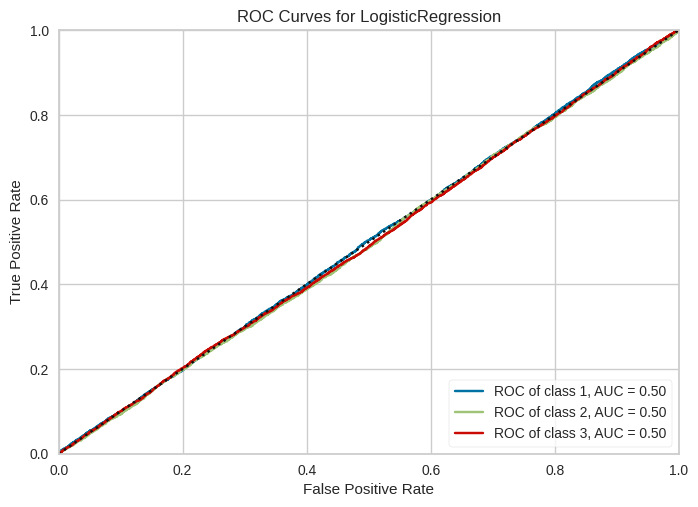

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Predict price (logistic)
X = data[['gender', 'age', 'category', 'quantity', 'payment_method', 'shopping_mall']]
Y = data['price']
X = scaler.fit_transform(X)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)
logis_accu_test = accuracy_score(y_test, y_pred_test)
logis_accu_train = accuracy_score(y_train, y_pred_train)

print(f"Train data accuracy: {logis_accu_train}")
print(f"Test data accuracy: {logis_accu_test}")

from sklearn import metrics
print(metrics.classification_report(y_pred_test, y_test))

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
weighted_avg_logis = precision_recall_fscore_support(y_pred_test, y_test, average='weighted')
print('Weighted Avg. Precision:', weighted_avg_logis[0])
print('Weighted Avg. Recall:', weighted_avg_logis[1])
print('Weighted Avg. F1-score:', weighted_avg_logis[2])

from yellowbrick.classifier import ROCAUC
model = LogisticRegression()
visualizer = ROCAUC(model, micro=False, macro=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


Train data accuracy: 0.4468673411675988
Test data accuracy: 0.4470138749245928
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.45      0.62     19892

    accuracy                           0.45     19892
   macro avg       0.33      0.15      0.21     19892
weighted avg       1.00      0.45      0.62     19892

Weighted Avg. Precision: 1.0
Weighted Avg. Recall: 0.4470138749245928
Weighted Avg. F1-score: 0.6178432462479155


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

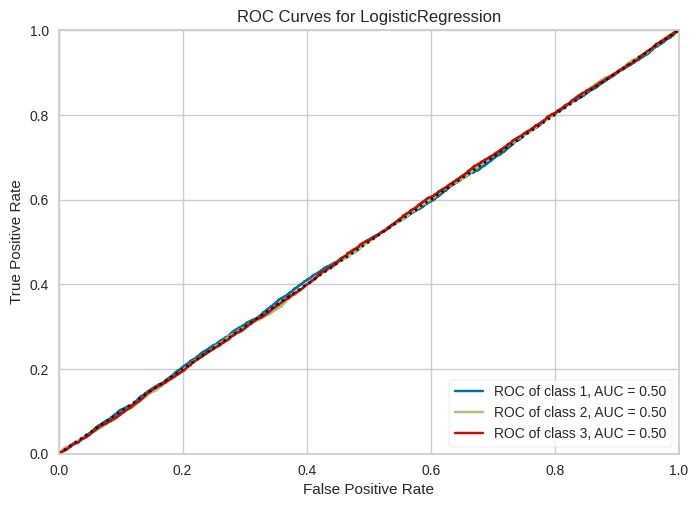

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Predict payment_method (logistic)
X = data[['gender', 'age', 'category', 'quantity', 'price', 'shopping_mall']]
Y = data['payment_method']

X = scaler.fit_transform(X)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

from sklearn.metrics import accuracy_score
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)
logis_accu_test = accuracy_score(y_test, y_pred_test)
logis_accu_train = accuracy_score(y_train, y_pred_train)

print(f"Train data accuracy: {logis_accu_train}")
print(f"Test data accuracy: {logis_accu_test}")

from sklearn import metrics
print(metrics.classification_report(y_pred_test, y_test))

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
weighted_avg_logis = precision_recall_fscore_support(y_pred_test, y_test, average='weighted')
print('Weighted Avg. Precision:', weighted_avg_logis[0])
print('Weighted Avg. Recall:', weighted_avg_logis[1])
print('Weighted Avg. F1-score:', weighted_avg_logis[2])

from yellowbrick.classifier import ROCAUC
model = LogisticRegression()
visualizer = ROCAUC(model, micro=False, macro=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Tuned Hyperparameters of Dicision tree model : {'criterion': 'entropy', 'max_depth': 7}
Dicision tree model Accuracy : 1.0
Train model Decision tree data accuracy: 1.0
Test model Decision tree data accuracy: 1.0
              precision    recall  f1-score   support

           5       1.00      1.00      1.00       633
          10       1.00      1.00      1.00       579
          11       1.00      1.00      1.00       213
          15       1.00      1.00      1.00       728
          20       1.00      1.00      1.00       564
          23       1.00      1.00      1.00       206
          26       1.00      1.00      1.00       591
          30       1.00      1.00      1.00       217
          35       1.00      1.00      1.00       606
          40       1.00      1.00      1.00       595
          45       1.00      1.00      1.00       198
          46       1.00      1.00      1.00       212
          58       1.00      1.00      1.00       196
          60       1.00      1.

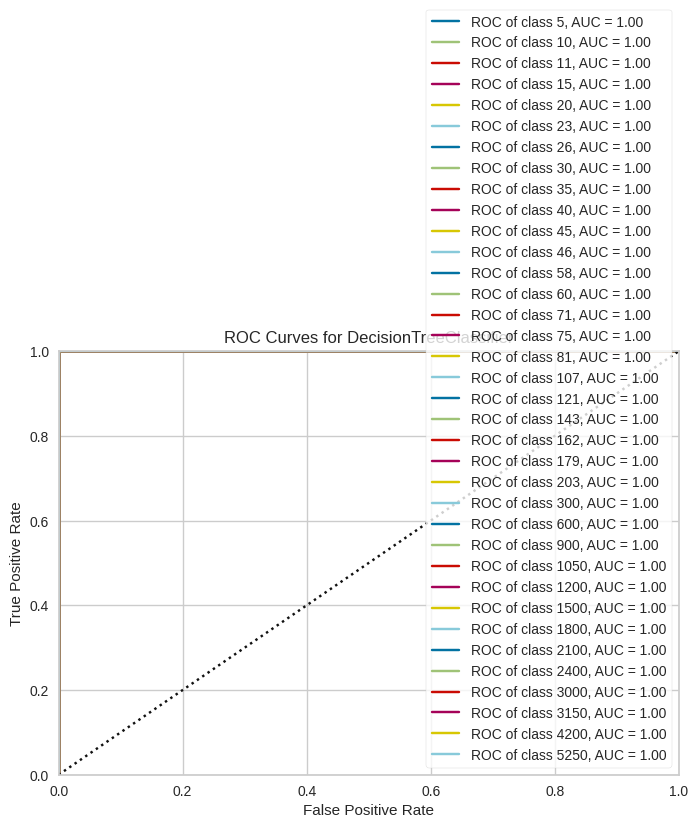

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Predict price (Decision tree)
features = ['gender', 'age', 'category', 'quantity', 'payment_method','shopping_mall']
X = data[features].values
Y = data['price'].values

#data ไม่ normolize
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size = 0.2, random_state = 20)

#train Decision tree model
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_1,y_train_1)

from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth' : range (1,101),
    'criterion'  : ['entropy', 'gini'],
}
clf = GridSearchCV(tree_model, parameters, scoring = 'accuracy')
clf.fit(X_train_1, y_train_1)

print("Tuned Hyperparameters of Dicision tree model :", clf.best_params_)
print("Dicision tree model Accuracy :",clf.best_score_)

#tree model ค่า accuracy
from sklearn.metrics import accuracy_score
y_pred_train_3 = tree_model.predict(X_train_1)
y_pred_test_3 = tree_model.predict(X_test_1)
print("Train model Decision tree data accuracy:",accuracy_score(y_train_1, y_pred_train_3))
print("Test model Decision tree data accuracy:",accuracy_score(y_test_1, y_pred_test_3))

#classification report
from sklearn import metrics
print(metrics.classification_report(y_pred_test_3, y_test_1))

from sklearn.metrics import precision_recall_fscore_support
weighted_avg_tree = precision_recall_fscore_support(y_pred_test_3, y_test_1, average = 'weighted')
print('Weighted Avg. Precision tree model :', weighted_avg_tree[0])
print('Weighted Avg. Recall tree model :', weighted_avg_tree[1])
print('Weighted Avg. F1-score tree model :', weighted_avg_tree[2])

#plot graph ROC curve
from yellowbrick.classifier import ROCAUC
visualizer_tree = ROCAUC(tree_model, micro = False, macro = False)
visualizer_tree.fit(X_train_1, y_train_1)
visualizer_tree.score(X_test_1, y_test_1)
visualizer_tree.show()

Tuned Hyperparameters of Dicision tree model : {'criterion': 'entropy', 'max_depth': 1}
Dicision tree model Accuracy : 0.44686734116759885
Train model Decision tree data accuracy: 0.6531138063218752
Test model Decision tree data accuracy: 0.3657249145385079
              precision    recall  f1-score   support

           1       0.45      0.35      0.40      8877
           2       0.14      0.19      0.16      3062
           3       0.40      0.45      0.42      7953

    accuracy                           0.37     19892
   macro avg       0.33      0.33      0.33     19892
weighted avg       0.38      0.37      0.37     19892

Weighted Avg. Precision tree model : 0.382193361223147
Weighted Avg. Recall tree model : 0.3657249145385079
Weighted Avg. F1-score tree model : 0.3705529630051246


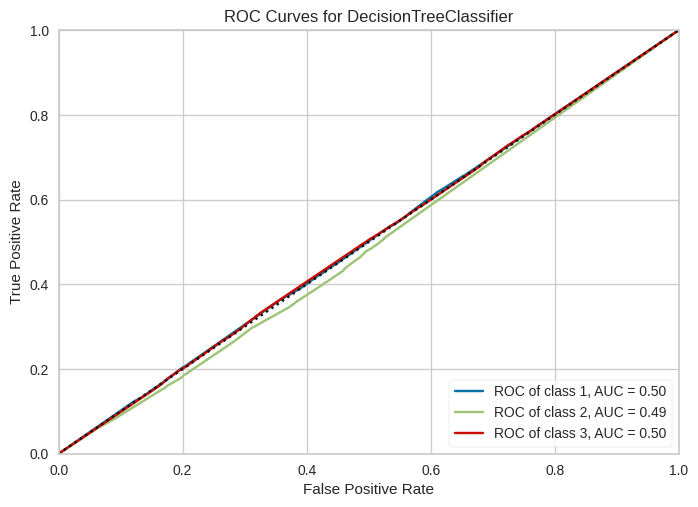

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Predict payment_method (Decision tree)
features = ['gender', 'age', 'category', 'quantity', 'price','shopping_mall']
X = data[features].values
Y = data['payment_method'].values

#data ไม่ normolize
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size = 0.2, random_state = 20)

#train Decision tree model
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_1,y_train_1)

from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth' : range (1,101),
    'criterion'  : ['entropy', 'gini'],
}
clf = GridSearchCV(tree_model, parameters, scoring = 'accuracy')
clf.fit(X_train_1, y_train_1)

print("Tuned Hyperparameters of Dicision tree model :", clf.best_params_)
print("Dicision tree model Accuracy :",clf.best_score_)

#tree model ค่า accuracy
from sklearn.metrics import accuracy_score
y_pred_train_3 = tree_model.predict(X_train_1)
y_pred_test_3 = tree_model.predict(X_test_1)
print("Train model Decision tree data accuracy:",accuracy_score(y_train_1, y_pred_train_3))
print("Test model Decision tree data accuracy:",accuracy_score(y_test_1, y_pred_test_3))

#classification report
from sklearn import metrics
print(metrics.classification_report(y_pred_test_3, y_test_1))

from sklearn.metrics import precision_recall_fscore_support
weighted_avg_tree = precision_recall_fscore_support(y_pred_test_3, y_test_1, average = 'weighted')
print('Weighted Avg. Precision tree model :', weighted_avg_tree[0])
print('Weighted Avg. Recall tree model :', weighted_avg_tree[1])
print('Weighted Avg. F1-score tree model :', weighted_avg_tree[2])

#plot graph ROC curve
from yellowbrick.classifier import ROCAUC
visualizer_tree = ROCAUC(tree_model, micro = False, macro = False)
visualizer_tree.fit(X_train_1, y_train_1)
visualizer_tree.score(X_test_1, y_test_1)
visualizer_tree.show()

0.9796267202915855
Train model naive data accuracy: 0.9796267202915855
Test model naive data accuracy: 0.9786848984516389
              precision    recall  f1-score   support

           5       1.00      1.00      1.00       633
          10       1.00      1.00      1.00       579
          11       1.00      1.00      1.00       213
          15       1.00      1.00      1.00       728
          20       1.00      1.00      1.00       564
          23       1.00      1.00      1.00       206
          26       1.00      1.00      1.00       591
          30       1.00      1.00      1.00       217
          35       1.00      1.00      1.00       606
          40       1.00      1.00      1.00       595
          45       1.00      1.00      1.00       198
          46       1.00      1.00      1.00       212
          58       1.00      1.00      1.00       196
          60       1.00      1.00      1.00       190
          71       1.00      1.00      1.00       383
          75 

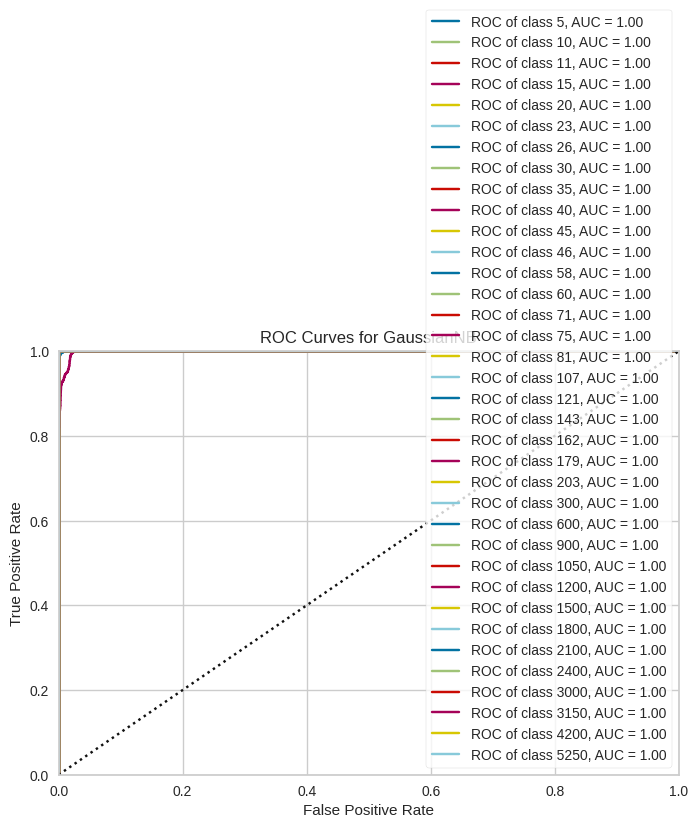

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Predict price (Gaussian Naïve Bayes)
features = ['gender', 'age', 'category', 'quantity', 'payment_method','shopping_mall']
X = data[features].values
Y = data['price'].values

#data ไม่ normolize
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size = 0.2, random_state = 20)

#train Decision naive bayes model
from sklearn.naive_bayes import GaussianNB
Gnb_model = GaussianNB()
Gnb_model.fit(X_train_1,y_train_1)
print(Gnb_model.score(X_train_1,y_train_1))

#naive bayes model ค่า accuracy
from sklearn.metrics import accuracy_score
y_pred_train_3 = Gnb_model.predict(X_train_1)
y_pred_test_3 = Gnb_model.predict(X_test_1)
print("Train model naive data accuracy:",accuracy_score(y_train_1, y_pred_train_3))
print("Test model naive data accuracy:",accuracy_score(y_test_1, y_pred_test_3))

#classification report
from sklearn import metrics
print(metrics.classification_report(y_pred_test_3, y_test_1))

from sklearn.metrics import precision_recall_fscore_support
weighted_avg_tree = precision_recall_fscore_support(y_pred_test_3, y_test_1, average = 'weighted')
print('Weighted Avg. Precision naive model :', weighted_avg_tree[0])
print('Weighted Avg. Recall naive model :', weighted_avg_tree[1])
print('Weighted Avg. F1-score naive model :', weighted_avg_tree[2])

#plot graph ROC curve
from yellowbrick.classifier import ROCAUC
visualizer_tree = ROCAUC(Gnb_model, micro = False, macro = False)
visualizer_tree.fit(X_train_1, y_train_1)
visualizer_tree.score(X_test_1, y_test_1)
visualizer_tree.show()

0.4468673411675988
Train model naive data accuracy: 0.4468673411675988
Test model naive data accuracy: 0.4470138749245928
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.45      0.62     19892

    accuracy                           0.45     19892
   macro avg       0.33      0.15      0.21     19892
weighted avg       1.00      0.45      0.62     19892

Weighted Avg. Precision naive model : 1.0
Weighted Avg. Recall naive model : 0.4470138749245928
Weighted Avg. F1-score naive model : 0.6178432462479155


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

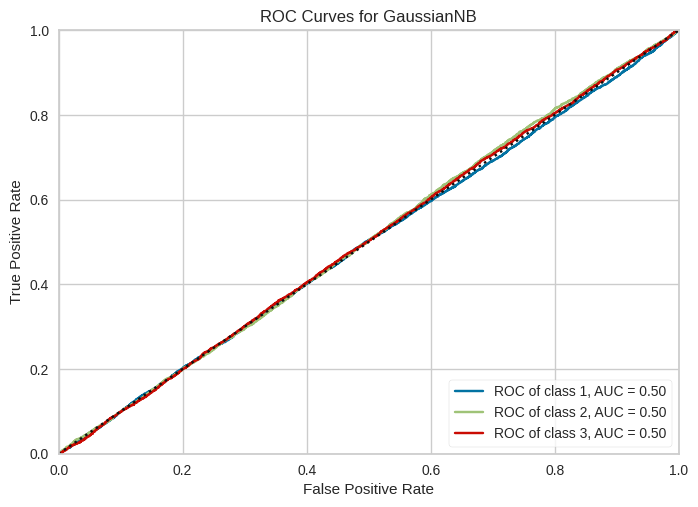

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#Predict payment_method (Gaussian Naïve Bayes)
features = ['gender', 'age', 'category', 'quantity', 'price','shopping_mall']
X = data[features].values
Y = data['payment_method'].values

#data ไม่ normolize
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, test_size = 0.2, random_state = 20)

#train Decision naive bayes model
from sklearn.naive_bayes import GaussianNB
Gnb_model = GaussianNB()
Gnb_model.fit(X_train_1,y_train_1)
print(Gnb_model.score(X_train_1,y_train_1))

#naive bayes model ค่า accuracy
from sklearn.metrics import accuracy_score
y_pred_train_3 = Gnb_model.predict(X_train_1)
y_pred_test_3 = Gnb_model.predict(X_test_1)
print("Train model naive data accuracy:",accuracy_score(y_train_1, y_pred_train_3))
print("Test model naive data accuracy:",accuracy_score(y_test_1, y_pred_test_3))

#classification report
from sklearn import metrics
print(metrics.classification_report(y_pred_test_3, y_test_1))

from sklearn.metrics import precision_recall_fscore_support
weighted_avg_tree = precision_recall_fscore_support(y_pred_test_3, y_test_1, average = 'weighted')
print('Weighted Avg. Precision naive model :', weighted_avg_tree[0])
print('Weighted Avg. Recall naive model :', weighted_avg_tree[1])
print('Weighted Avg. F1-score naive model :', weighted_avg_tree[2])

#plot graph ROC curve
from yellowbrick.classifier import ROCAUC
visualizer_tree = ROCAUC(Gnb_model, micro = False, macro = False)
visualizer_tree.fit(X_train_1, y_train_1)
visualizer_tree.score(X_test_1, y_test_1)
visualizer_tree.show()

In [ ]:
#Deploy model
new_data = pd.read_excel('Test model.xlsx')
print(new_data)

    gender  age  category  quantity  price  shopping_mall  payment_method
0        1   30         1         1   1500              1               1
1        2   51         1         2   1800              2               3
2        2   40         8         5     60              4               2
3        1   25         5         3   3000              5               1
4        2   62         6         4     30              3               2
5        1   42         4         2     58              6               3
6        2   92         2         5     10              7               2
7        2   42         3         3   4200              5               1
8        2   82         7         1     35              6               2
9        1   62         5         1     60              3               3
10       2   50         5         2     80              3               2
11       1   10         6         3     90              2               1
12       2   20         2         4   

In [ ]:
#Predict price (Decision tree)
features = ['gender', 'age', 'category', 'quantity', 'payment_method','shopping_mall']
X_new = new_data[features].values
Y_new = new_data['price'].values

from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_new,Y_new)

y_pred_new = tree_model.predict(X_new)

from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
accuracy = accuracy_score(Y_new, y_pred_new)
report = classification_report(Y_new, y_pred_new)
weighted_avg = precision_recall_fscore_support(Y_new, y_pred_new, average='weighted')

print('Test data accuracy:', accuracy)
print('Classification Report:\n', report)
print('Weighted Avg. Precision:', weighted_avg[0])
print('Weighted Avg. Recall:', weighted_avg[1])
print('Weighted Avg. F1-score:', weighted_avg[2])


Test data accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          10       1.00      1.00      1.00         1
          30       1.00      1.00      1.00         1
          35       1.00      1.00      1.00         1
          40       1.00      1.00      1.00         1
          50       1.00      1.00      1.00         1
          58       1.00      1.00      1.00         1
          60       1.00      1.00      1.00         2
          70       1.00      1.00      1.00         1
          80       1.00      1.00      1.00         1
          90       1.00      1.00      1.00         1
         500       1.00      1.00      1.00         1
         900       1.00      1.00      1.00         1
        1200       1.00      1.00      1.00         1
        1500       1.00      1.00      1.00         1
        1800       1.00      1.00      1.00         1
        2000       1.00      1.00      1.00         1
        2500       1.00      1.00

In [ ]:
#Predict payment_method (logistic)
X = new_data[['gender', 'age', 'category', 'quantity', 'price', 'shopping_mall']]
Y = new_data['payment_method']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.metrics import accuracy_score
y_pred_test = lr_model.predict(X)
logis_accu_test = accuracy_score(Y, y_pred_test)

print(f"Test data accuracy: {logis_accu_test}")

from sklearn import metrics
print(metrics.classification_report(y_pred_test, Y))

from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
weighted_avg_logis = precision_recall_fscore_support(y_pred_test, Y, average='weighted')
print('Weighted Avg. Precision:', weighted_avg_logis[0])
print('Weighted Avg. Recall:', weighted_avg_logis[1])
print('Weighted Avg. F1-score:', weighted_avg_logis[2])






Test data accuracy: 0.25
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.25      0.40        20

    accuracy                           0.25        20
   macro avg       0.33      0.08      0.13        20
weighted avg       1.00      0.25      0.40        20

Weighted Avg. Precision: 1.0
Weighted Avg. Recall: 0.25
Weighted Avg. F1-score: 0.4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin